# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [2]:
# who: real estate investors
# what: housing price calculator
# why: to determine housing prices without a lengthy valuation process

# 3. Homework - work with your own data

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [4]:

import kagglehub
from kagglehub import KaggleDatasetAdapter


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:


file_path = "austinHousingData.csv"


df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "ericpierce/austinhousingprices",
  file_path,
  # Provide any additional arguments like 
    pandas_kwargs={"sep": ","}
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())
df.info()
df.describe()



/tmp/ipykernel_9560/3214187927.py:4: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


First 5 records:          zpid          city          streetAddress  zipcode  \
0   111373431  pflugerville   14424 Lake Victor Dr    78660   
1   120900430  pflugerville     1104 Strickling Dr    78660   
2  2084491383  pflugerville    1408 Fort Dessau Rd    78660   
3   120901374  pflugerville     1025 Strickling Dr    78660   
4    60134862  pflugerville  15005 Donna Jane Loop    78660   

                                         description   latitude  longitude  \
0  14424 Lake Victor Dr, Pflugerville, TX 78660 i...  30.430632 -97.663078   
1  Absolutely GORGEOUS 4 Bedroom home with 2 full...  30.432673 -97.661697   
2  Under construction - estimated completion in A...  30.409748 -97.639771   
3  Absolutely darling one story home in charming ...  30.432112 -97.661659   
4  Brimming with appeal & warm livability! Sleek ...  30.437368 -97.656860   

   propertyTaxRate  garageSpaces  hasAssociation  ...  numOfMiddleSchools  \
0             1.98             2            True  ...     

,zpid,zipcode,latitude,longitude,propertyTaxRate,garageSpaces,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,...,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories
count,1.517100e+04,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,1.517100e+04,15171.000000,...,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000,15171.000000
mean,1.044193e+08,78735.932964,30.291596,-97.778532,1.994085,1.229187,1.224507,1988.554743,5.127677e+05,3.032892,...,0.049173,1.035990,0.976798,1.838495,5.779912,1237.304660,14.857228,2.683010,3.440380,1.467273
std,3.179426e+08,18.893475,0.096973,0.084715,0.053102,1.352117,1.352732,21.579458,4.531853e+05,2.487392,...,0.234937,0.263633,0.292043,1.068376,1.860276,326.513311,1.741857,1.054445,0.849942,0.523697
min,2.858495e+07,78617.000000,30.085030,-98.022057,1.980000,0.000000,0.000000,1905.000000,5.500000e+03,1.000000,...,0.000000,0.000000,0.000000,0.200000,2.333333,396.000000,10.000000,0.000000,0.000000,1.000000
25%,2.941115e+07,78727.000000,30.203313,-97.838009,1.980000,0.000000,0.000000,1974.000000,3.090000e+05,1.000000,...,0.000000,1.000000,1.000000,1.100000,4.000000,966.000000,14.000000,2.000000,3.000000,1.000000
50%,2.949441e+07,78739.000000,30.284416,-97.769539,1.980000,1.000000,1.000000,1993.000000,4.050000e+05,2.000000,...,0.000000,1.000000,1.000000,1.566667,5.778694,1287.000000,15.000000,3.000000,3.000000,1.000000
75%,7.033762e+07,78749.000000,30.366585,-97.717903,1.980000,2.000000,2.000000,2006.000000,5.750000e+05,4.000000,...,0.000000,1.000000,1.000000,2.266667,7.000000,1496.000000,16.000000,3.000000,4.000000,2.000000
max,2.146313e+09,78759.000000,30.517323,-97.569504,2.210000,22.000000,22.000000,2020.000000,1.350000e+07,23.000000,...,2.000000,3.000000,2.000000,9.000000,9.500000,1913.000000,19.000000,27.000000,20.000000,4.000000


In [6]:
duplicates = df[df.duplicated()]
print(duplicates)

print('There are no duplicated data rows')

Empty DataFrame
Columns: [zpid, city, streetAddress, zipcode, description, latitude, longitude, propertyTaxRate, garageSpaces, hasAssociation, hasCooling, hasGarage, hasHeating, hasSpa, hasView, homeType, parkingSpaces, yearBuilt, latestPrice, numPriceChanges, latest_saledate, latest_salemonth, latest_saleyear, latestPriceSource, numOfPhotos, numOfAccessibilityFeatures, numOfAppliances, numOfParkingFeatures, numOfPatioAndPorchFeatures, numOfSecurityFeatures, numOfWaterfrontFeatures, numOfWindowFeatures, numOfCommunityFeatures, lotSizeSqFt, livingAreaSqFt, numOfPrimarySchools, numOfElementarySchools, numOfMiddleSchools, numOfHighSchools, avgSchoolDistance, avgSchoolRating, avgSchoolSize, MedianStudentsPerTeacher, numOfBathrooms, numOfBedrooms, numOfStories, homeImage]
Index: []

[0 rows x 47 columns]
There are no duplicated data rows


In [16]:
duplicate_values = df.apply(lambda x: x[x.duplicated()].unique(), axis=0)
print(duplicate_values)

print('While there are dupliucated values, there are no duplicated Zillow IDs so we can assume all transactions are unique')

zpid                                                                         []
city                          [pflugerville, del valle, austin, driftwood, m...
streetAddress                 [2604 Arion Cir, 238 Lavaca Heights Dr, 4716 A...
zipcode                       [78660, 78617, 78717, 78725, 78747, 78726, 787...
description                   [Coming soon! Photos and details will be avail...
latitude                      [30.431062698364247, 30.442386627197266, 30.49...
longitude                     [-97.7947235107422, -97.58674621582033, -97.78...
propertyTaxRate                                              [1.98, 2.21, 2.01]
garageSpaces                             [2, 0, 6, 4, 3, 5, 1, 7, 10, 8, 9, 12]
hasAssociation                                                    [True, False]
hasCooling                                                        [True, False]
hasGarage                                                         [True, False]
hasHeating                              

In [8]:

df2 = df.select_dtypes(include=['int64', 'float64'])

mean_values = df2.mean()
median_values = df2.median()
mode_values = df2.mode()

print('The mean values are:',mean_values)


The mean values are: zpid                          1.044193e+08
zipcode                       7.873593e+04
latitude                      3.029160e+01
longitude                    -9.777853e+01
propertyTaxRate               1.994085e+00
garageSpaces                  1.229187e+00
parkingSpaces                 1.224507e+00
yearBuilt                     1.988555e+03
latestPrice                   5.127677e+05
numPriceChanges               3.032892e+00
latest_salemonth              6.733043e+00
latest_saleyear               2.019078e+03
numOfPhotos                   3.064043e+01
numOfAccessibilityFeatures    1.298530e-02
numOfAppliances               3.474722e+00
numOfParkingFeatures          1.710105e+00
numOfPatioAndPorchFeatures    6.633709e-01
numOfSecurityFeatures         4.668776e-01
numOfWaterfrontFeatures       2.768440e-03
numOfWindowFeatures           2.084899e-01
numOfCommunityFeatures        1.885176e-02
lotSizeSqFt                   1.190840e+05
livingAreaSqFt                2.2

In [9]:
print('The median values are:',median_values)


The median values are: zpid                          2.949441e+07
zipcode                       7.873900e+04
latitude                      3.028442e+01
longitude                    -9.776954e+01
propertyTaxRate               1.980000e+00
garageSpaces                  1.000000e+00
parkingSpaces                 1.000000e+00
yearBuilt                     1.993000e+03
latestPrice                   4.050000e+05
numPriceChanges               2.000000e+00
latest_salemonth              7.000000e+00
latest_saleyear               2.019000e+03
numOfPhotos                   2.900000e+01
numOfAccessibilityFeatures    0.000000e+00
numOfAppliances               3.000000e+00
numOfParkingFeatures          2.000000e+00
numOfPatioAndPorchFeatures    0.000000e+00
numOfSecurityFeatures         0.000000e+00
numOfWaterfrontFeatures       0.000000e+00
numOfWindowFeatures           0.000000e+00
numOfCommunityFeatures        0.000000e+00
lotSizeSqFt                   8.276000e+03
livingAreaSqFt                1

In [10]:
print('The mode values are:',mode_values)

The mode values are:              zpid  zipcode   latitude  longitude  propertyTaxRate  \
0        28584946  78748.0  30.179701 -97.769577             1.98   
1        28585671      NaN        NaN        NaN              NaN   
2        28585687      NaN        NaN        NaN              NaN   
3        28587235      NaN        NaN        NaN              NaN   
4        28587911      NaN        NaN        NaN              NaN   
...           ...      ...        ...        ...              ...   
15166  2144047485      NaN        NaN        NaN              NaN   
15167  2145150551      NaN        NaN        NaN              NaN   
15168  2145190846      NaN        NaN        NaN              NaN   
15169  2145702640      NaN        NaN        NaN              NaN   
15170  2146313225      NaN        NaN        NaN              NaN   

       garageSpaces  parkingSpaces  yearBuilt  latestPrice  numPriceChanges  \
0               0.0            0.0     2006.0     325000.0             

In [14]:
missing_values = df.isnull().sum()

print(missing_values)
print('There are two missing values in "description"')

zpid                          0
city                          0
streetAddress                 0
zipcode                       0
description                   2
latitude                      0
longitude                     0
propertyTaxRate               0
garageSpaces                  0
hasAssociation                0
hasCooling                    0
hasGarage                     0
hasHeating                    0
hasSpa                        0
hasView                       0
homeType                      0
parkingSpaces                 0
yearBuilt                     0
latestPrice                   0
numPriceChanges               0
latest_saledate               0
latest_salemonth              0
latest_saleyear               0
latestPriceSource             0
numOfPhotos                   0
numOfAccessibilityFeatures    0
numOfAppliances               0
numOfParkingFeatures          0
numOfPatioAndPorchFeatures    0
numOfSecurityFeatures         0
numOfWaterfrontFeatures       0
numOfWin

In [ ]:
#encoded variables

categorical_columns = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

print(df_encoded.head())

         zpid  zipcode   latitude  longitude  propertyTaxRate  garageSpaces  \
0   111373431    78660  30.430632 -97.663078             1.98             2   
1   120900430    78660  30.432673 -97.661697             1.98             2   
2  2084491383    78660  30.409748 -97.639771             1.98             0   
3   120901374    78660  30.432112 -97.661659             1.98             2   
4    60134862    78660  30.437368 -97.656860             1.98             0   

   hasAssociation  hasCooling  hasGarage  hasHeating  ...  \
0            True        True       True        True  ...   
1            True        True       True        True  ...   
2            True        True      False        True  ...   
3            True        True       True        True  ...   
4            True        True      False        True  ...   

   homeImage_96639287_f77eacba9fa1f1166707109cd65860c8-p_f.jpg  \
0                                              False             
1                         

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

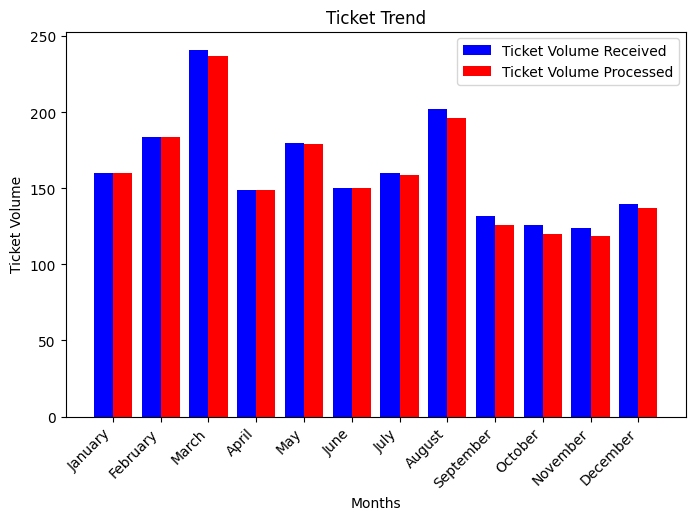

In [13]:
import matplotlib.pyplot as plt

months = ["January", "February", "March", "April", "May", "June", "July", "August", 
          "September", "October", "November", "December"]
received = [160, 184, 241, 149, 180, 150, 160, 202, 132, 126, 124, 140]
processed = [160, 184, 237, 149, 179, 150, 159, 196, 126, 120, 119, 137]

fig, ax = plt.subplots(figsize=(8, 5))

x = range(len(months)) 
width = .4


rects1 = ax.bar([i - width/2 for i in x], received, width, label="Ticket Volume Received", color='blue')
rects2 = ax.bar([i + width/2 for i in x], processed, width, label="Ticket Volume Processed", color='red')

ax.set_xlabel("Months")
ax.set_ylabel("Ticket Volume")
ax.set_title("Ticket Trend")
ax.set_xticks(x)
ax.set_xticklabels(months, rotation=45, ha="right")
ax.legend()